### Excercise - 3

#### Neural Networks

In [40]:
import h5py

In [41]:
import numpy as np

In [42]:
save("/Users/nirmal/MyOctaveWorks/Ex in python/ex3data1.mat","-v7")

'' was not found in history, as a file, url, nor in the user namespace.


In [43]:
import scipy.io as sio

In [44]:
import os

#### Load data

In [45]:
inputlayersize = 400
num_labels = 10
data = sio.loadmat(os.path.join('Data','/Users/nirmal/MyOctaveWorks/Ex in python/ex3data1.mat'))

In [46]:
X,y = data['X'],data['y'].ravel()

In [47]:
X.shape

(5000, 400)

In [48]:
y.shape

(5000,)

In [49]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
y[:5]

array([10, 10, 10, 10, 10], dtype=uint8)

#### Visualizing the data

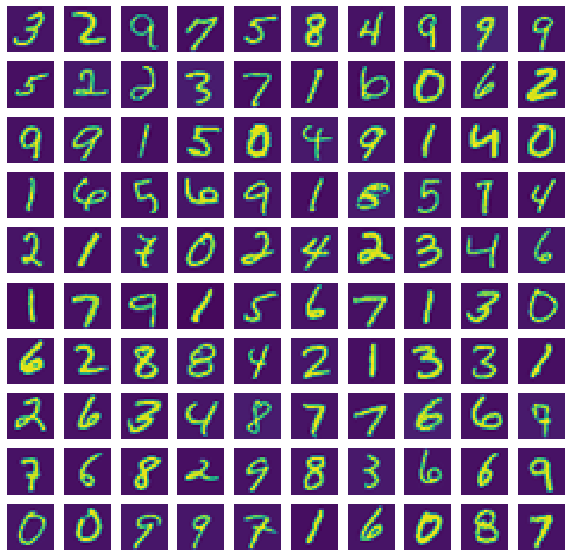

In [51]:
import matplotlib.pyplot as plt
_,axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axarr[i,j].imshow(X[np.random.randint(X.shape[0])].reshape((20,20),order = 'F'))
        axarr[i,j].axis('off')

#### SIgmoid function

In [52]:
def sigMoid(z):
    return 1/(1+np.exp(-z))

In [53]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
y_t = np.array([1,0,1,0,1]).reshape(5,1)
lamda = 3
X_t = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15]
X_t = np.array(X_t).reshape(5,3)
X_t = np.concatenate((np.ones((5,1)),X_t),axis = 1)

In [54]:
def lrcostFunction(theta,x,y,lamda):
    m = len(y)
    h=sigMoid(x@theta)
    J = np.sum(-y.T @ np.log(h) - (1 - y).T @ np.log(1-h))/m + lamda*np.sum(theta[1:]**2)/(2*m)
    
    Grad = x.T @ (h-y)/m
    ones = np.ones((4,1))
    ones[0] = 0
    grad = Grad + (lamda/m)*theta*ones
    return J,grad

In [55]:
def costFunctionReg(theta,x,y,lamda):
    m = len(y)
    temp1 = np.multiply(y,np.log(sigMoid(np.dot(x,theta))))
    temp2 = np.multiply(1-y,np.log(1-sigMoid(np.dot(x,theta))))
    J = np.sum(temp1+temp2)/(-m) + np.sum(theta[1:]**2)*lamda/(2*m)
    return J

In [56]:
def gradReg(theta,x,y,lamda):
    m,n =x.shape 
    h = sigMoid(x@theta)

    Grad = x.T @ (h-y)/m
    ones = np.ones((n,1))
    ones[0] = 0
    grad = Grad + (lamda/m)*theta*ones
    return grad

In [57]:
[J, grad] = lrcostFunction(theta_t,X_t,y_t,lamda)

In [58]:
costFunctionReg(np.array([-2,-1,1,2]).reshape(4,1),X_t,y_t,lamda)

2.741630508121846

In [59]:
gradReg(np.array([-2,-1,1,2]).reshape(4,1),X_t,y_t,lamda)

array([[-0.33503578],
       [-0.68165769],
       [ 0.49736992],
       [ 1.07639752]])

In [60]:
print(J)
print(grad)

2.741630508121846
[[-0.33503578]
 [-0.68165769]
 [ 0.49736992]
 [ 1.07639752]]


In [61]:
theta_t

array([[-2],
       [-1],
       [ 1],
       [ 2]])

#### OneVsAll function

In [63]:
# load data and X,y
X,y = data['X'],data['y'].ravel()
# Define X,y
lamda = 0.1
m = len(y)
k = 10
X = np.concatenate((np.ones((m,1)),X),axis = 1)
m,n = X.shape
y = y.reshape(m,1)

theta0 = np.zeros((k,n))

In [135]:
def gradientDescent(theta,x,y,alpha,num_iters,k):
    m,n = x.shape
#     J_history = []
    for i in range(k):
        thetai = theta[i].reshape(n,1)
        xi = x[i*500:(i+1)*500-1]
        yi = y[i*500:(i+1)*500-1]
        for j in range(0,num_iters-1):
            h = sigMoid(xi@thetai)
            thetai -= alpha*(1/m)*(xi.T@(h-yi)) 
#         J_history.append(costFunctionReg(thetai,xi,yi,0.1))
    return theta

In [68]:
test=theta0[0].reshape(n,1)

In [70]:
test.shape

(401, 1)

In [136]:
result = gradientDescent(theta0,X,y,0.1,50,10)

In [137]:
result.shape

(10, 401)

In [138]:
result[0,:80].reshape(10,8)

array([[ 3.30755975e+02,  0.00000000e+00,  0.00000000e+00,
         7.77940170e-09, -1.54983848e-04, -1.17759851e-03,
         4.44397923e-02,  5.65818847e-02],
       [ 2.28132422e-02,  6.95104366e-03,  7.60707737e-03,
         2.30867490e-03, -1.74759577e-03, -4.38291930e-03,
        -9.96430940e-03, -1.07244541e-02],
       [-6.04157433e-03, -1.89524226e-03, -1.27285391e-05,
         2.00903804e-05,  0.00000000e+00,  1.69329555e-05,
        -1.70445691e-04, -3.60254237e-05],
       [-3.31727530e-03, -5.58813492e-03,  7.18170709e-02,
         2.56711761e-01,  3.56914148e-01,  2.74902987e-01,
         7.29223054e-02, -8.48848073e-02],
       [-1.34454592e-01, -1.57654905e-01, -1.32319948e-01,
        -1.01263250e-01, -5.98518042e-02, -2.27466370e-02,
        -1.00449851e-02, -2.80503478e-03],
       [-1.06626102e-03, -1.45262398e-04,  1.64304272e-03,
        -3.47423505e-03,  1.37284417e-02,  1.21898664e-01,
         6.70263367e-01,  1.49025384e+00],
       [ 1.93999890e+00,  1.418089

In [133]:
J

[inf, nan, inf, inf, inf, inf, inf, inf, inf, inf]